# CHD:Coronary Heart Disease Prediction using Logistic Regression and confusion matrix

In [1]:
import nltk
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import math
import seaborn as sns
import os 

In [2]:
pwd

'C:\\Users\\pc\\Desktop\\AI final proj'

In [3]:
df_raw=pd.read_csv('framingham.csv' , encoding ='latin1')
df_raw

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
len(df_raw)

4240

In [5]:
df_raw.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df_raw.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

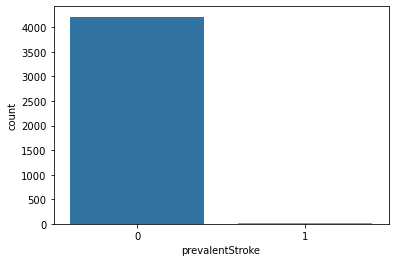

In [7]:
sns.countplot(x='prevalentStroke', data=df_raw)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

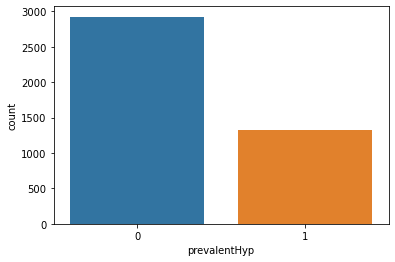

In [8]:
sns.countplot(x='prevalentHyp', data=df_raw)

<AxesSubplot:ylabel='Frequency'>

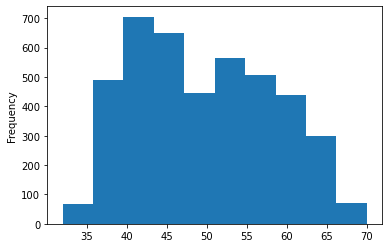

In [9]:
df_raw['age'].plot.hist()


<AxesSubplot:ylabel='Frequency'>

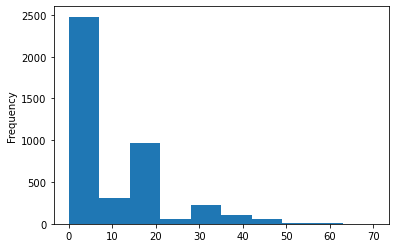

In [10]:
df_raw['cigsPerDay'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

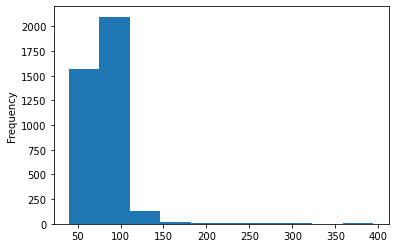

In [11]:
df_raw['glucose'].plot.hist()

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

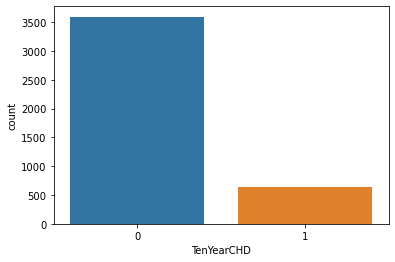

In [12]:
sns.countplot(x='TenYearCHD', data=df_raw)

In [13]:
df_raw.isnull()
df_raw

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [14]:
df_raw.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

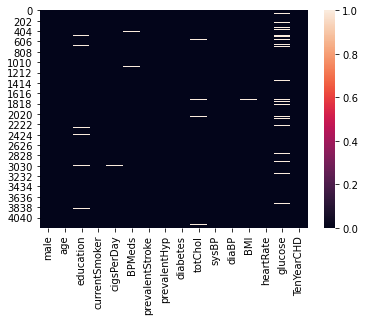

In [15]:
sns.heatmap(df_raw.isnull())

In [16]:
df_raw.drop("education", axis=1, inplace=True)
df_raw
#df_raw['currentSmoker']

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [17]:
glucose_mean=df_raw['glucose'].mean()
print(glucose_mean)

81.96365524402907


In [18]:
BMI_mean=df_raw['BMI'].mean()
print(BMI_mean)

25.800800758114182


In [19]:

cigsPerDay_mean=df_raw['cigsPerDay'].mean()
print(cigsPerDay_mean)

9.005936832106388


In [20]:

heartRate_mean=df_raw['heartRate'].mean()
print(heartRate_mean)

75.87898089171975


In [21]:
df_raw['glucose'].replace(to_replace=np.nan, value=glucose_mean, inplace=True)
df_raw['BMI'].replace(to_replace=np.nan, value=BMI_mean, inplace=True)
df_raw['cigsPerDay'].replace(to_replace=np.nan, value=cigsPerDay_mean, inplace=True)
df_raw['heartRate'].replace(to_replace=np.nan, value=heartRate_mean, inplace=True)


In [22]:
df_raw['currentSmoker'].replace(to_replace=np.nan, value=1, inplace=True)

In [23]:
df_raw.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [24]:

totChol_mean=df_raw['totChol'].mean()
print(totChol_mean)

236.69952267303103


In [25]:
df_raw['totChol'].replace(to_replace=np.nan, value=totChol_mean, inplace=True)


In [26]:
df_raw['BPMeds'].replace(to_replace=np.nan, value=0, inplace=True)

In [27]:
df_raw.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
df_raw

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [29]:
df_raw.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:>

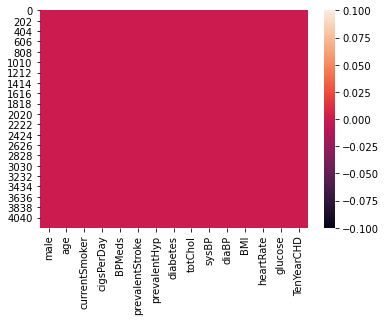

In [30]:
sns.heatmap(df_raw.isnull())

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

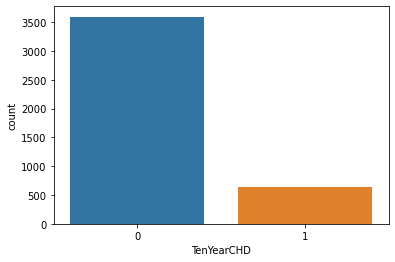

In [31]:
sns.countplot(x="TenYearCHD", data=df_raw)

In [32]:
X=df_raw.drop("TenYearCHD" , axis=1)
y=df_raw["TenYearCHD"].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',max_iter=500)
clf=logreg.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy

0.8643867924528302

In [34]:
#from sklearn.datasets import load_iris
#from sklearn import preprocessing
#iris=load_iris()
#print(iris.data.shape)

In [35]:
#X=iris.data
#y=iris.target
#normalized_X=preprocessing.normalize(X)

In [36]:
print("Accuracy score:" +str(accuracy_score(y_test,y_pred)))
print("Precision score:" +str(precision_score(y_test,y_pred)))
print("Recall score:" +str(recall_score(y_test,y_pred)))
print("F1 score:" +str(f1_score(y_test,y_pred)))


Accuracy score:0.8643867924528302
Precision score:0.5909090909090909
Recall score:0.1092436974789916
F1 score:0.1843971631205674


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[720   9]
 [106  13]]


In [38]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8643867924528302

In [39]:
#from sklearn.model_selection import GridSearchCV
#yes=LogisticRegression()
#grid_values={"penalty":['l1','l2'] , 'C':[0.01,0.009,0.01,0.09,1,5,9,25,15,101]}
#grid_yes_acc=GridSearchCV(yes,param_grid=grid_values,scoring='accuracy')
#grid_yes_acc.fit(X_train,y_train)
#y_pred=grid_yes_acc.predict(X_test)


In [45]:
X=[]
X.append(float(input("male or female,'1', means 'Yes_male', '0' means 'No'")))
X.append(float(input("enter your age")))
X.append(float(input("whether or not the patient is a current smoker,binary: '1', means 'Yes', '0' means 'No'")))
X.append(float(input("the number of cigarettes that the person smoked on average in one day")))
X.append(float(input("whether or not the patient was on blood pressure medication,binary: '1', means 'Yes', '0' means 'No'")))
X.append(float(input("whether or not the patient had previously had a stroke,binary: '1', means 'Yes', '0' means 'No'")))
X.append(float(input("whether or not the patient was hypertensive,binary: '1', means 'Yes', '0' means 'No'")))
X.append(float(input("whether or not the patient had diabetes,binary: '1', means 'Yes', '0' means 'No'")))
X.append(float(input("total cholesterol level ")))
X.append(float(input("systolic blood pressure")))
X.append(float(input("diastolic blood pressure")))
X.append(float(input("Mass Index")))
X.append(float(input("heart rate")))
X.append(float(input("glucose level ")))



male or female,'1', means 'Yes_male', '0' means 'No'1
enter your age54
whether or not the patient is a current smoker,binary: '1', means 'Yes', '0' means 'No'1
the number of cigarettes that the person smoked on average in one day12
whether or not the patient was on blood pressure medication,binary: '1', means 'Yes', '0' means 'No'1
whether or not the patient had previously had a stroke,binary: '1', means 'Yes', '0' means 'No'1
whether or not the patient was hypertensive,binary: '1', means 'Yes', '0' means 'No'1
whether or not the patient had diabetes,binary: '1', means 'Yes', '0' means 'No'1
total cholesterol level 152
systolic blood pressure145
diastolic blood pressure92
Mass Index65
heart rate105
glucose level 145


In [46]:
X = np.array(X)
print(X)
a = pd.DataFrame(X)

[  1.  54.   1.  12.   1.   1.   1.   1. 152. 145.  92.  65. 105. 145.]


In [47]:
#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
y_pred=logreg.predict(X.reshape(1,-1))

print(y_pred)
#X, y = load_iris(return_X_y=True)
results = {1:'High Risk', 0:'Low Risk'} #creating a set containing the potential results. You can change the 'Relevant' and 'Not relevant' tag
print(results[int(y_pred)])

perc=logreg.predict_proba(X.reshape(1,-1))
print(perc)



[1]
High Risk
[[0.18913841 0.81086159]]
